In [3]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline



# retinas

In [4]:
from retina.retina_theanized import Retina

In [5]:
import random
def spawn_retina(param_dict = None):
    
    if param_dict is None:
    
        x0 = np.random.normal(0,1000)
        y0 = np.random.normal(0,1000)
        z0 = np.random.uniform(-100,15000)

        z_c = np.random.uniform(z0-3000,z0+3000)
        alpha = np.arctan(-x0/(z_c-z0)) + np.random.normal(0,0.1)
        beta = np.arctan(-y0/(z_c-z0)) + np.random.normal(0,0.1)

        xdim=ydim=32
        
        
        dangle = np.pi/random.choice([3,3,3,6])
        dalpha = dangle
        dbeta = dangle
        
        alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
        bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)

        variance = random.choice([50,100,250,500])
        
        param_names = "x0,y0,z0,alpha,beta,variance,xdim,ydim,dalpha,dbeta".split(',')

        params = map(str,[x0,y0,z0,alpha,beta,variance,
                                xdim,ydim,dalpha,dbeta])
        param_dict = dict(zip(param_names,params))
    else:
        param_names = "x0,y0,z0,alpha,beta,variance,xdim,ydim,dalpha,dbeta".split(',')

        x0,y0,z0,alpha,beta,variance,xdim,ydim,dalpha,dbeta = map(param_dict.get,param_names)
        

    
    retina = Retina(np.array([x0,y0,z0]),alphas,bethas,variance=variance)
    
    
    return retina,param_dict


In [107]:
retinas,param_dicts = map(list,zip(*[spawn_retina() for i in range(10)]))

In [6]:
#retina testing

def test(retina,n=8):
    from retinize import retinize_folder
    imgs= retinize_folder("/mnt/KSfinder/mc_sig_hits/", retina, out_file=None, max_rows=n ,n_shards=n)

    for i in range(len(imgs)):
        from matplotlib import pyplot as plt
        %matplotlib inline
        plt.imshow(imgs[i].reshape(32,32))
        plt.show()

In [122]:
del retinas[i]
del param_dicts[i]

In [123]:
i = 5
print param_dicts[i]
test(retinas[i])

IndexError: list index out of range

In [124]:
approved_retinas += retinas
approved_pdicts += param_dicts
print len(retinas),len(approved_retinas)

5 31


In [45]:
approved_retinas = []
approved_pdicts = []

In [129]:
# retina that sits after VELO
ks = np.zeros(3)
ks[2]+=2000
xdim = ydim = 32
dalpha = np.pi/8
dbeta = np.pi/8
alpha = 0
beta = 0
alphas = np.linspace(-dalpha+alpha, alpha+dalpha,num=xdim)
bethas = np.linspace(-dbeta+beta, beta+dbeta,num=ydim)
sigma = 50
#ks = KS[evtids_ks[i]][2]

retina_afterVelo = Retina(ks,alphas,bethas,variance=sigma)

In [131]:
param_names = "x0,y0,z0,alpha,beta,variance,xdim,ydim,dalpha,dbeta".split(',')
x0,y0,z0 = ks
params = map(str,[x0,y0,z0,alpha,beta,sigma,
                                xdim,ydim,dalpha,dbeta])
param_dict = dict(zip(param_names,params))

In [132]:
approved_retinas.append(retina_afterVelo)
approved_pdicts.append(param_dict)

In [136]:
for i in range(len(approved_retinas)):
    approved_retinas[i].param_dict = approved_pdicts[i]

retinas = {
    "retina"+str(i):approved_retinas[i]
    for i in range(len(approved_retinas))
}

# prepare metadata

In [7]:
sig_folder = "/mnt/KSfinder/mc_sig_hits/"
output_folder = "/mnt/KSfinder/finder/retinas_randomized"
!mkdir /mnt/KSfinder/finder/retinas_randomized

mkdir: cannot create directory '/mnt/KSfinder/finder/retinas_randomized': File exists


### save retinas themselves

In [8]:
import pickle
import os
read = True
if read:
    retina_names = map(lambda name: name[:-4],
                       filter(lambda s:s.startswith("retina"),os.listdir(output_folder)))

    retinas = {
        retina_name: pickle.load(
            open(
                os.path.join(
                    output_folder,
                    retina_name+".pcl"
                )
            )
        )
        for retina_name in retina_names
    }
retinas.items()[:5]

[('retina30', <retina.retina_theanized.Retina instance at 0x7f1208be4488>),
 ('retina31', <retina.retina_theanized.Retina instance at 0x7f120a175cb0>),
 ('retina0', <retina.retina_theanized.Retina instance at 0x7f1209eb6680>),
 ('retina1', <retina.retina_theanized.Retina instance at 0x7f12080db7e8>),
 ('retina2', <retina.retina_theanized.Retina instance at 0x7f1207b56998>)]

### retinize hits, save both hits and names

In [9]:
import time
import pickle
import os
for retina_name, retina in retinas.items():
    
    fpath = os.path.join(output_folder,retina_name+'.pcl')
    with open(fpath,'w')as fout:
        pickle.dump(retina,fout)
        print "saved",retina_name, 'to',fpath


saved retina30 to /mnt/KSfinder/finder/retinas_randomized/retina30.pcl
saved retina31 to /mnt/KSfinder/finder/retinas_randomized/retina31.pcl
saved retina0 to /mnt/KSfinder/finder/retinas_randomized/retina0.pcl
saved retina1 to /mnt/KSfinder/finder/retinas_randomized/retina1.pcl
saved retina2 to /mnt/KSfinder/finder/retinas_randomized/retina2.pcl
saved retina3 to /mnt/KSfinder/finder/retinas_randomized/retina3.pcl
saved retina4 to /mnt/KSfinder/finder/retinas_randomized/retina4.pcl
saved retina5 to /mnt/KSfinder/finder/retinas_randomized/retina5.pcl
saved retina6 to /mnt/KSfinder/finder/retinas_randomized/retina6.pcl
saved retina7 to /mnt/KSfinder/finder/retinas_randomized/retina7.pcl
saved retina8 to /mnt/KSfinder/finder/retinas_randomized/retina8.pcl
saved retina9 to /mnt/KSfinder/finder/retinas_randomized/retina9.pcl
saved retina27 to /mnt/KSfinder/finder/retinas_randomized/retina27.pcl
saved retina26 to /mnt/KSfinder/finder/retinas_randomized/retina26.pcl
saved retina25 to /mnt/KSf

In [ ]:
import time
for i in range(480):#to prevent unstoppable sleep
    time.sleep(60)

In [ ]:
from retinize import retinize_folder

for retina_name, retina in retinas.items():
    
    print "It's",time.ctime(),", sir."

    print "processing", retina_name
    
    names,images = retinize_folder(sig_folder,retina,
                              max_rows = float('inf'),
                             out_file = None,
                             return_names = True,)
    #save representations
    print "saving..."
    img_fpath = os.path.join(output_folder,"images_from_"+retina_name+'.npy')
    np.save(img_fpath,images)
    print 'images saved at',img_fpath
    
    name_fpath = os.path.join(output_folder,"image_event_names_from_"+retina_name+'.pcl')
    with open(name_fpath,'w') as fout:
        pickle.dump(names,fout)
    print 'names saved at',name_fpath
    print "done"
                              
    

It's Sat Jan  9 23:16:50 2016 , sir.
processing retina30
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_randomized/images_from_retina30.npy
names saved at /mnt/KSfinder/finder/retinas_randomized/image_event_names_from_retina30.pcl
done
It's Sun Jan 10 00:04:00 2016 , sir.
processing retina31
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_randomized/images_from_retina31.npy
names saved at /mnt/KSfinder/finder/retinas_randomized/image_event_names_from_retina31.pcl
done
It's Sun Jan 10 00:51:27 2016 , sir.
processing retina0
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_randomized/images_from_retina0.npy
names saved at /mnt/KSfinder/finder/retinas_randomized/image_event_names_from_retina0.pcl
done
It's Sun Jan 10 01:31:17 2016 , sir.
processing retina1
applying retina...
done
saving...
images saved at /mnt/KSfinder/finder/retinas_randomized/images_from_retina1.npy
names saved at /mnt/KSfinder/

In [30]:
#assemble them into a single dataset
name_sequences = []
image_sequences = []
for retina_name, retina in retinas.items():
    
    print "loading", retina_name,'data'
    with open(os.path.join(output_folder,"image_event_names_from_"+retina_name+'.pcl')) as fnames:
        name_sequences.append(pickle.load(fnames))
    
    
    image_sequences.append( np.load( os.path.join(output_folder,"images_from_"+retina_name+'.npy') ) )
    
    
    

loading retina30 data
loading retina31 data
loading retina0 data
loading retina1 data
loading retina2 data
loading retina3 data
loading retina4 data
loading retina5 data
loading retina6 data
loading retina7 data
loading retina8 data
loading retina9 data
loading retina27 data
loading retina26 data
loading retina25 data
loading retina24 data
loading retina23 data
loading retina22 data
loading retina21 data
loading retina20 data
loading retina29 data
loading retina28 data
loading retina18 data
loading retina19 data
loading retina12 data
loading retina13 data
loading retina10 data
loading retina11 data
loading retina16 data
loading retina17 data
loading retina14 data
loading retina15 data


In [31]:
#assert that the names go in the same order
reference_names = names = name_sequences[0]
for seq in name_sequences:
    assert reference_names == seq
print "all sequences are aligned correctly"

all sequences are aligned correctly


In [32]:
#get the order of (runIDs,eventIDs) of the images
run_event_pairs = map(lambda name: name.split(".")[0].split("_"), names)
runIDs,eventIDs =  zip(*run_event_pairs)
runIDs = map(int,runIDs)
eventIDs = map(int,eventIDs)

In [33]:
#aggregate images from all retinas
joint_images = map( np.concatenate, zip(*image_sequences))
joint_images = np.vstack(joint_images)

xdim = ydim = 32
#xdim, ydim left from last retina initialization... or are they?
joint_images = joint_images.reshape(-1,len(image_sequences),xdim,ydim)

(31704, 32, 32, 32)


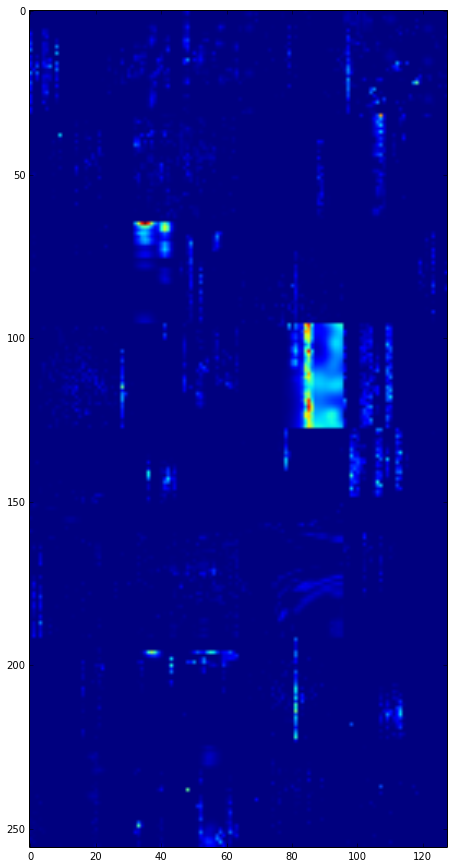

In [34]:
print joint_images.shape
#sanity check: sample image tuple, stacked horizontally
plt.figure(figsize=[30,15])
plt.imshow(np.hstack([
        np.vstack(joint_images[0,0::4]),
        np.vstack(joint_images[0,1::4]),
        np.vstack(joint_images[0,2::4]),
        np.vstack(joint_images[0,3::4])
                  ]
    ))

### read decays

In [35]:
#auxilary functions to preprocess decay data
import pandas as pd
def decayQuality(decayString):
    '''how orthodoxal KS is [lower = better]'''
    particle_codes = decayString.split('&')
    piplus_count = particle_codes.count('211')
    piminus_count = particle_codes.count('-211')
    
    if piplus_count ==0 and piminus_count ==0: return float('inf')
    
    return len(particle_codes) - piplus_count - piminus_count
def preprocess_decay_data(df_path,
                          min_decay_z = 500,
                          max_quality = 5,
                          max_origin_distance=0,
                          min_flight_distance = 0,
                          ):
    """load KS decay dataframe generated by /preprocess/KS_extractor.py 
    and filter out irrelevant decays (e.g. Ks->2pi0)"""
    
    print "reading",df_path

    
    decay_df = pd.DataFrame.from_csv(df_path,index_col=None,sep=';')
    decay_df.children = decay_df.children.astype(np.string_)

    print len(np.unique( (decay_df.runID,decay_df.eventID))),'events in dataframe'


    decay_df["originDistanceZ"] = (decay_df.originZ - decay_df.primaryZ)
    
    decay_df["decayQuality"] = map(decayQuality,decay_df.children)
    
    decay_vectors = decay_df[["decayX","decayY","decayZ"]].values
    origin_vectors = decay_df[["originX","originY","originZ"]].values
    decay_df["flightDistance"] = np.linalg.norm(decay_vectors-origin_vectors,axis=1)
    
    
    isGood = np.logical_and.reduce([
        decay_df.decayQuality <=max_quality,
        decay_df.originDistanceZ.abs() <= max_origin_distance,
        decay_df.flightDistance >= min_flight_distance,
        decay_df.decayZ >= min_decay_z
    ])
    good_decay_df = decay_df[isGood]
    print len(np.unique( (good_decay_df.runID,good_decay_df.eventID))),'events left with relevant decays'
    return good_decay_df

In [36]:
decay_df_paths = ["/mnt/KSfinder/mc_sig/KS_decays_5.csv","/mnt/KSfinder/mc_sig/KS_decays_6.csv"]

decay_dataframe_shards = map(preprocess_decay_data,decay_df_paths)

decays = pd.concat(decay_dataframe_shards)

print len(decays),'relevant decays total in all dataframes'
print 'grouping...'

#function (runID(int),eventID(int)) -> decays for this pair(df)
decay_groups = decays.groupby(["runID","eventID"],as_index=True)

#strip unused columns
decay_groups = decay_groups[[u'decayX',u'decayY',u'decayZ',u'children',u'flightDistance']]

#e.g. decay_groups.get_group((3695761 ,485762))
print 'done'

reading /mnt/KSfinder/mc_sig/KS_decays_5.csv
17573 events in dataframe
11798 events left with relevant decays
reading /mnt/KSfinder/mc_sig/KS_decays_6.csv
17664 events in dataframe
11761 events left with relevant decays
46737 relevant decays total in all dataframes
grouping...
done


# generate output via percentile mappers

In [37]:
from retina.percentile_grid import Multiramp,PercentileSpaceMapper1D

In [38]:
#on what PercentileSpaceMapper does, see percentile-mapper-tests.ipynb

xmapper = PercentileSpaceMapper1D(decays.decayX,n_centers=50,activation=Multiramp(15,2))
ymapper = PercentileSpaceMapper1D(decays.decayY,n_centers=50,activation=Multiramp(15,2))
zmapper = PercentileSpaceMapper1D(decays.decayZ,n_centers=50,activation=Multiramp(15,2))


# Aggregation

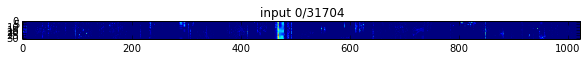

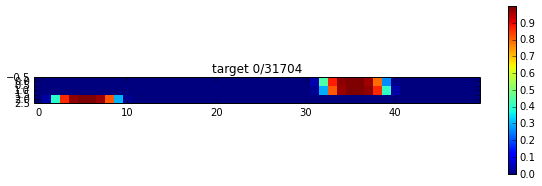

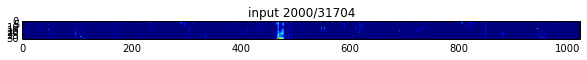

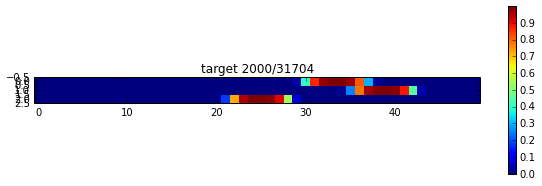

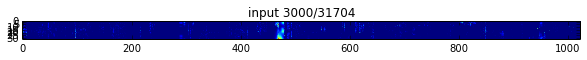

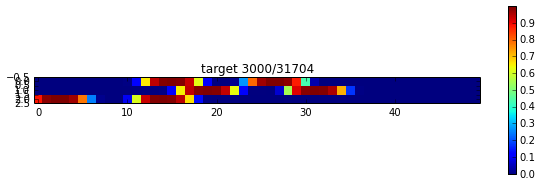

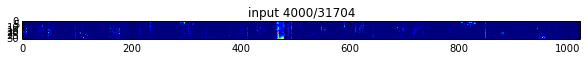

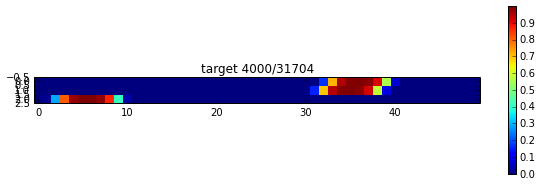

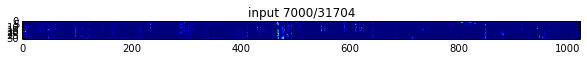

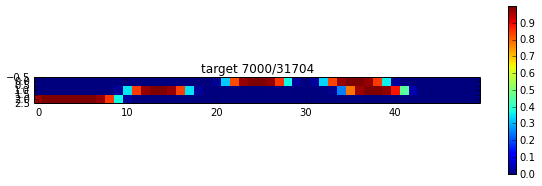

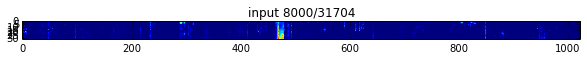

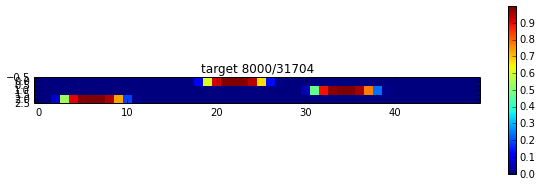

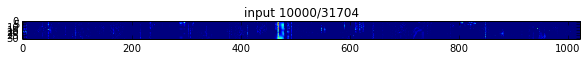

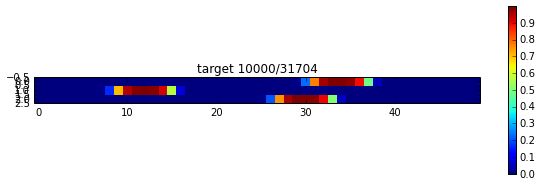

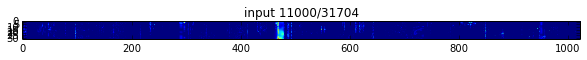

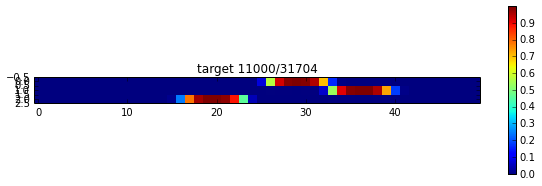

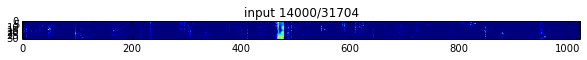

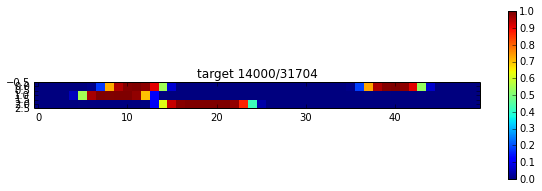

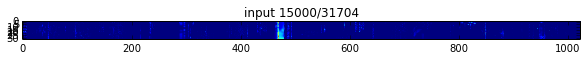

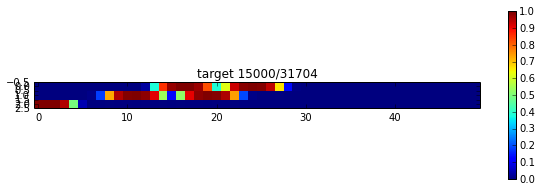

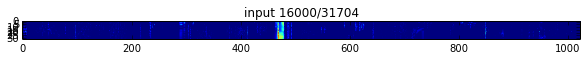

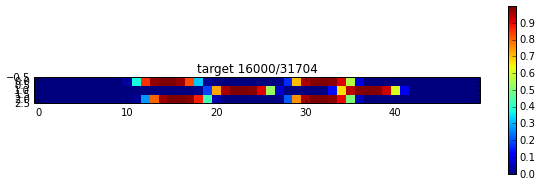

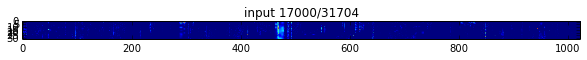

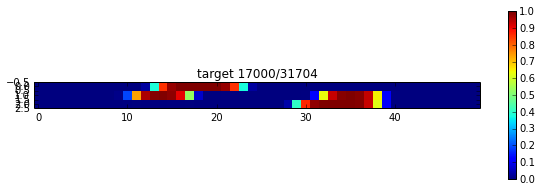

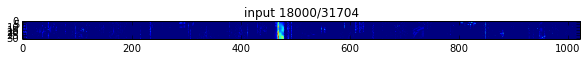

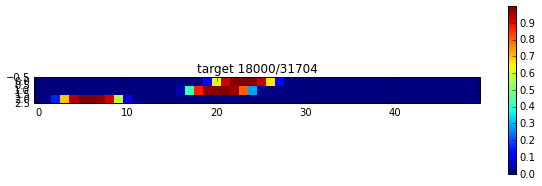

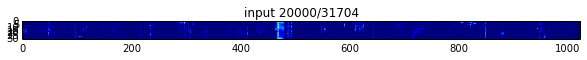

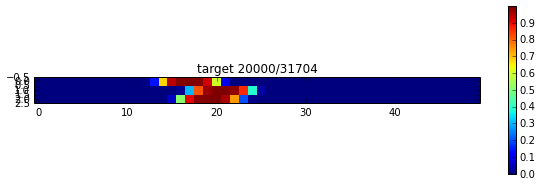

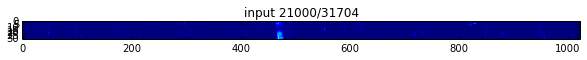

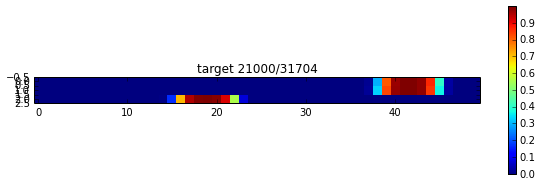

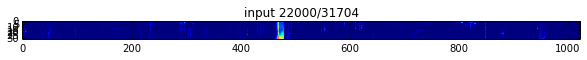

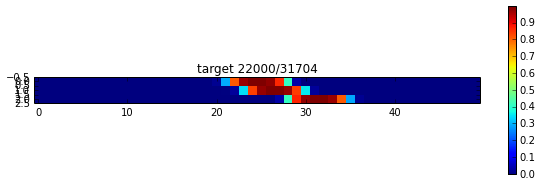

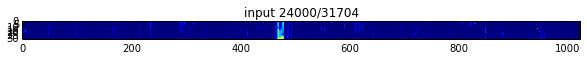

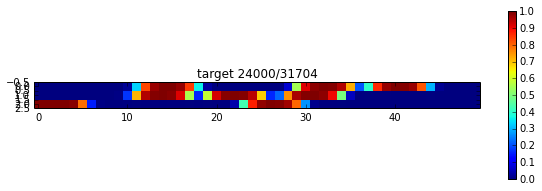

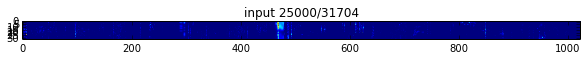

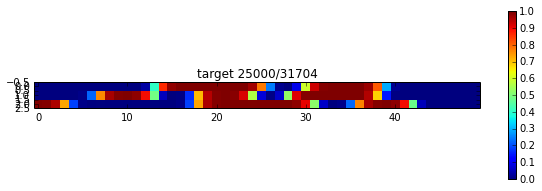

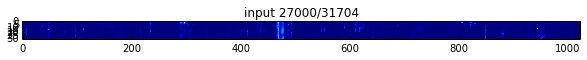

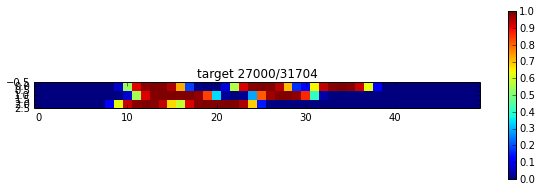

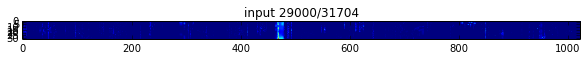

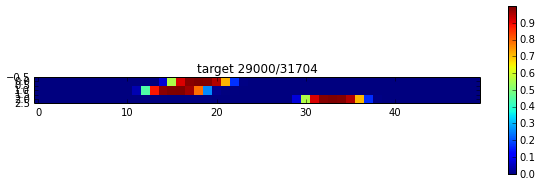

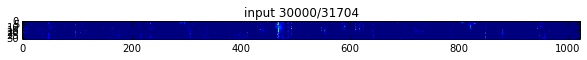

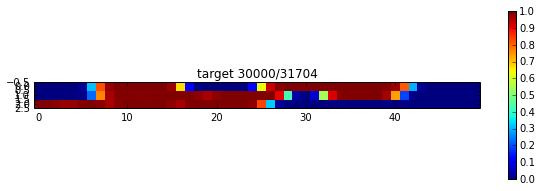

CPU times: user 1min 27s, sys: 7.02 s, total: 1min 34s
Wall time: 1min 26s


In [39]:
%%time

#aligning images with decays
# sorry i'm just too lazy to implement joblib parallelism here, 
# even so, it takes a tea cup to process 30k events


#runIDs,eventIDs are left from retina image preprocessing phase

X_images = []
y_images = []
y_counts = []
for i,(runID,eventID,image_set) in enumerate(zip(runIDs,eventIDs,joint_images)):
    
    if (runID,eventID) not in decay_groups.groups:
        continue
    
    event_decays = decay_groups.get_group((runID,eventID))
    
    
    xmap = xmapper.get_activity_percentile(event_decays.decayX.values)
    ymap = ymapper.get_activity_percentile(event_decays.decayY.values)
    zmap = zmapper.get_activity_percentile(event_decays.decayZ.values)
    n_decays = len(event_decays)
    
    target = np.vstack([xmap,ymap,zmap])
    
    X_images.append(image_set)
    y_images.append(target)
    y_counts.append(n_decays)
    
    if i%1000==0:
        plt.figure(figsize = [10,3])
        plt.title("input %s/%s"%(i,len(joint_images)))
        plt.imshow(np.hstack(image_set))
        plt.show()
        plt.figure(figsize = [10,3])
        plt.title("target %s/%s"%(i,len(joint_images)))
        plt.imshow(target,interpolation='none')
        plt.colorbar()
        plt.show()
    
    

In [40]:
prepend_dim = lambda img:img[np.newaxis,...]

X = np.concatenate(map(prepend_dim,X_images))
y = np.concatenate(map(prepend_dim,y_images))
y_counts = np.array(y_counts)
print X.shape, y.shape

(21198, 32, 32, 32) (21198, 3, 50)


In [41]:
np.save(os.path.join(output_folder,"ksfinder_images_full.npy"),X)
np.save(os.path.join(output_folder,"ksfinder_targets_full.npy"),y)
np.save(os.path.join(output_folder,"ksfinder_target_counts_full.npy"),y_counts)


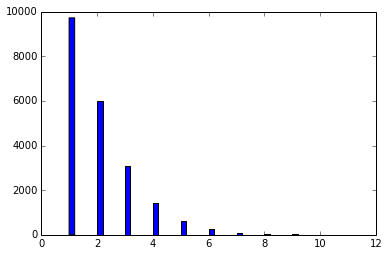

In [44]:
_=plt.hist(y_counts,bins=50)